In [1]:
# use pip to install pandas, matplotlib if needed
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

set_config(display="text")  # displays text representation of estimators
from utils import *

In [33]:
# prepare data
mxf = pd.read_csv('/home/nfs/dengy/dl-survival-miRNA/simulation/MSKpair_MXF_merge.csv', index_col='key_0')
pmfh = pd.read_csv('/home/nfs/dengy/dl-survival-miRNA/simulation/MSKpair_PMFH_merge.csv', index_col='key_0')

data_df = pd.concat([mxf, pmfh], axis=0)
data_df = pd.concat([data_df.iloc[:, 0:1033],
                    data_df[['DEATH_STATUS', 'ttDeath']]], axis=1)

data_df['time'] = data_df['ttDeath']
data_df['status'] = data_df['DEATH_STATUS'].replace({'Alive': '0', 'Dead': '1'})
data_df = data_df.drop(columns=['DEATH_STATUS', 'ttDeath'])
data_df
# FIRST TIME: split data into train (0.8) and test (0.2) set
data = np.asarray(data_df)
train_df, test_df = train_test_split(data_df, test_size=0.2, 
                shuffle=True, random_state=42,
                stratify=data_df["status"])
# pd.Series(train_df.index).to_csv(
#     os.path.join("data", date, "train_index.csv"), index=False)
# pd.Series(test_df.index).to_csv(
#     os.path.join("data", date, "test_index.csv"), index=False)

# train_ind = pd.read_csv(os.path.join(data_folder, "train_index.csv")).iloc[:,0]
# test_ind = pd.read_csv(os.path.join(data_folder, "test_index.csv")).iloc[:,0]

# train_df = data_df.iloc[train_ind,:]
# test_df = data_df.iloc[test_ind,:]

## Directly output train_test data
# train_df.to_csv(f"data/{date}/simulate_survival_train.csv", index=False)
# test_df.to_csv(f"data/{date}/simulate_survival_test.csv", index=False)

In [36]:
data_df

,hsa-let-7a-2*,hsa-let-7a(3),hsa-let-7a*(2),hsa-let-7b,hsa-let-7b*,hsa-let-7c,hsa-let-7c*,hsa-let-7d,hsa-let-7d*,hsa-let-7e,...,hsa-miR-96,hsa-miR-96*,hsa-miR-98,hsa-miR-98*,hsa-miR-99a,hsa-miR-99a*,hsa-miR-99b,hsa-miR-99b*,time,status
key_0,,,,,,,,,,,,,,,,,,,,,
MXF2516,0,84773,3392,8844,29,27704,10,5995,39,2314,...,8,0,5064,352,1513,15,0,0,156.85,0
MXF742,0,6366,15,4483,14,433,0,666,19,640,...,0,0,489,9,1193,2,864,30,95.31,1
MXF772,0,60273,157,25624,73,16656,15,4336,121,3483,...,2,0,1272,17,32913,156,2698,95,33.12,1
MXF832,2,72284,363,27736,112,6951,3,2976,86,2861,...,10,0,1147,33,6582,34,1867,60,8.54,1
MXF836,2,47409,123,17270,85,13865,38,3856,115,2486,...,4,0,866,14,19420,51,2443,98,108.45,0
MXF875,1,56953,361,18000,49,13604,7,3555,163,4225,...,21,0,1371,20,13604,88,3025,211,88.41,0
MXF906,0,127231,240,25940,59,28152,36,4010,79,6761,...,15,0,1167,22,23570,230,4242,100,108.06,0
MXF908,2,89726,368,17546,48,11921,11,6255,77,6563,...,8,0,1592,50,23698,41,3307,141,155.89,1
MXF912,1,53958,113,15832,32,8156,3,2631,28,2191,...,13,0,943,16,14154,37,1499,66,101.42,0


# Tree Methods
## Random Survival Forest

In [34]:
# prepare data
X_train, y_train = dataframe_to_scikitsurv_ds(train_df)
X_test, y_test = dataframe_to_scikitsurv_ds(test_df)

In [8]:
%%time
random_state = 42
n=500

rsf = RandomSurvivalForest(
    n_estimators=500, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=random_state
)
rsf.fit(X_train[:n], y_train[:n])
score = rsf.score(X_test, y_test)
print(score)

0.7333466733366684
CPU times: user 42.7 s, sys: 388 ms, total: 43.1 s
Wall time: 5.96 s


In [12]:
# monitor = EarlyStoppingMonitor(10, 5)

# rsf_early_stop = RandomSurvivalForest(
#     n_estimators=500, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=random_state
# ).fit(X_train[:n], y_train[:n], monitor=monitor)
# score = rsf_early_stop.score(X_test, y_test)
# print(score)

In [19]:
%%time
random_state = 42
subset = [50, 200, 500, 1000, 2000, 5000, 8000]
rsf_dict, rsf_train_scores, rsf_test_scores = {},{},{}

for n in subset:
    start = time.time() #record iteration start time
    
    # train the forest with subset of training set
    rsf = RandomSurvivalForest(
        n_estimators=500, 
        min_samples_split=10, 
        min_samples_leaf=15, 
        n_jobs=-1, random_state=random_state
    ).fit(X_train[:n], y_train[:n])

    stop = time.time() #Record time when training finished
    duration = round(stop - start, 2)
    
    train_sc = rsf.score(X_train[:n], y_train[:n])
    test_sc = rsf.score(X_test, y_test)
    print(f"N={n} Training time ({duration}s): Train C-Index: {round(train_sc,3)} | Test C-index: {round(test_sc,3)}")
    
    rsf_train_scores[str(n)] = train_sc
    rsf_test_scores[str(n)] = test_sc
    rsf_dict[str(n)] = rsf
    
#### OLD Scores
# 0.7567028514257128
# 0.8131055527763882
# 0.8276813406703352
# 0.8504412206103051
# 0.8567188594297148

N=50 Training time (1.67s): Train C-Index: 0.8179591836734694 | Test C-index: 0.6269144572286143
N=200 Training time (1.38s): Train C-Index: 0.8337688442211055 | Test C-index: 0.7161860930465233
N=500 Training time (5.23s): Train C-Index: 0.8278396793587174 | Test C-index: 0.7333466733366684
N=1000 Training time (24.26s): Train C-Index: 0.8331131131131131 | Test C-index: 0.7506423211605803
N=2000 Training time (119.71s): Train C-Index: 0.8352256128064032 | Test C-index: 0.7543821910955478
N=5000 Training time (848.3s): Train C-Index: 0.8323171034206841 | Test C-index: 0.7683871935967984
N=8000 Training time (2315.39s): Train C-Index: 0.8329373984248031 | Test C-index: 0.7732251125562781
CPU times: user 7h 33min 37s, sys: 6min 30s, total: 7h 40min 7s
Wall time: 58min 2s


## Gradient Boosting

In [6]:
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [21]:
est_early_stopping = GradientBoostingSurvivalAnalysis(
    n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=1, random_state=0
)

monitor = EarlyStoppingMonitor(10, 5)

est_early_stopping.fit(X_train, y_train, monitor=monitor)

print("Fitted base learners:", est_early_stopping.n_estimators_)

cindex = est_early_stopping.score(X_test, y_test)
print("Performance on test set", round(cindex, 3))

KeyboardInterrupt: 

In [17]:
%%time
random_state = 42
subset = [50, 200, 500, 1000, 2000, 5000, 8000]
gb_dict, gb_train_scores, gb_test_scores = {},{},{}
for n in subset:
    start = time.time()
    gb = GradientBoostingSurvivalAnalysis(
        n_estimators=500, learning_rate=0.1, max_depth=1, random_state=0
        ).fit(X_train[:n], y_train[:n])
    gb_dict[str(n)] = gb
    stop = time.time()
    duration = round(stop-start, 3)
    
    train_score = gb.score(X_train[:n], y_train[:n])
    gb_train_scores[str(n)] = train_score
    test_score = gb.score(X_test, y_test)
    gb_test_scores[str(n)] = test_score
        
    print(
        f'N={n} Training Time {duration}s:\tTrain C-Index: {train_score} | Test C-Index: {test_score}'
    )

Train C-Index: 0.9918367346938776	| Test C-Index: 0.7448410690579366
Train C-Index: 0.9416264090177133	| Test C-Index: 0.7726718933947849
Train C-Index: 0.8974929690638811	| Test C-Index: 0.789535355559452
Train C-Index: 0.8696315018755892	| Test C-Index: 0.7998797685544673
Train C-Index: 0.8456953526199313	| Test C-Index: 0.8047316083460662
Train C-Index: 0.8256932671453335	| Test C-Index: 0.807749918593292


# Baseline: CoxPH model

In [23]:
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold

/tmp/ipykernel_377934/3934129116.py:1: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=1000).
  coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001, max_iter=1000).fit(X_train, y_train)


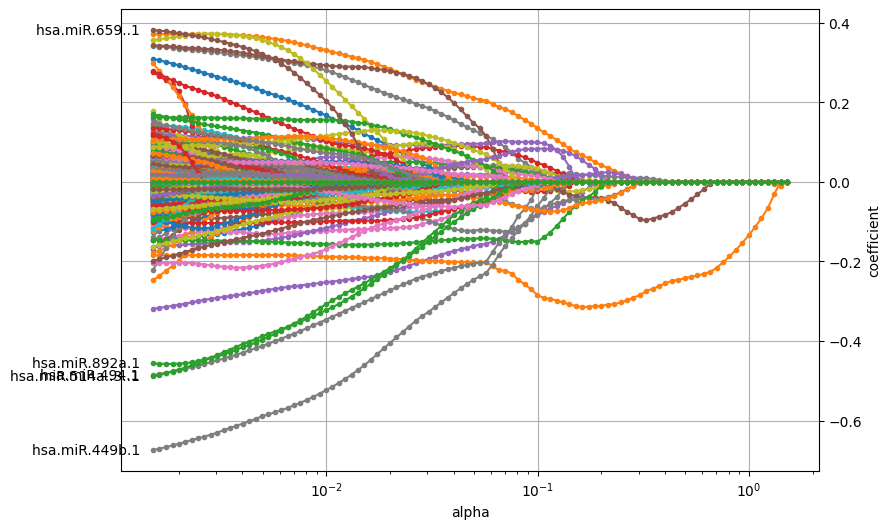

In [70]:
coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.001, max_iter=1000).fit(X_train, y_train)

coefficients = pd.DataFrame(coxnet.coef_, index=train_df.columns[:-2], columns=np.round(coxnet.alphas_, 5))
plot_coefficients(coefficients, n_highlight=5)

In [30]:
alphas =  [0.001,0.01,0.05,0.1] #coxnet.alphas_
ratios = np.arange(0.1, 1.1, 0.2)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
coxnet_cv = GridSearchCV(
    CoxnetSurvivalAnalysis(l1_ratio=0.9),
    param_grid={
        # "alphas": [[a] for a in alphas],
        'l1_ratio': ratios
    },
    cv=cv,
    error_score=0.5,
    n_jobs=-1,
).fit(X_train, y_train)

cv_results = pd.DataFrame(coxnet_cv.cv_results_)

In [37]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,38.090304,1.634103,0.054292,0.001992,0.1,{'l1_ratio': 0.1},0.837122,0.837362,0.842846,0.828931,0.862859,0.841824,0.011417,2
1,35.073919,1.171649,0.065953,0.017192,0.3,{'l1_ratio': 0.30000000000000004},0.837562,0.836949,0.841978,0.829000,0.863046,0.841707,0.011460,4
2,32.653134,2.113800,0.109160,0.035098,0.5,{'l1_ratio': 0.5000000000000001},0.837814,0.837375,0.841484,0.828905,0.862749,0.841665,0.011319,5
3,28.477747,4.269240,0.138607,0.041554,0.7,{'l1_ratio': 0.7000000000000001},0.838102,0.836925,0.842172,0.829037,0.863455,0.841938,0.011570,1
4,31.384554,1.711732,0.125139,0.030281,0.9,{'l1_ratio': 0.9000000000000001},0.838131,0.836751,0.841759,0.828904,0.863348,0.841779,0.011572,3


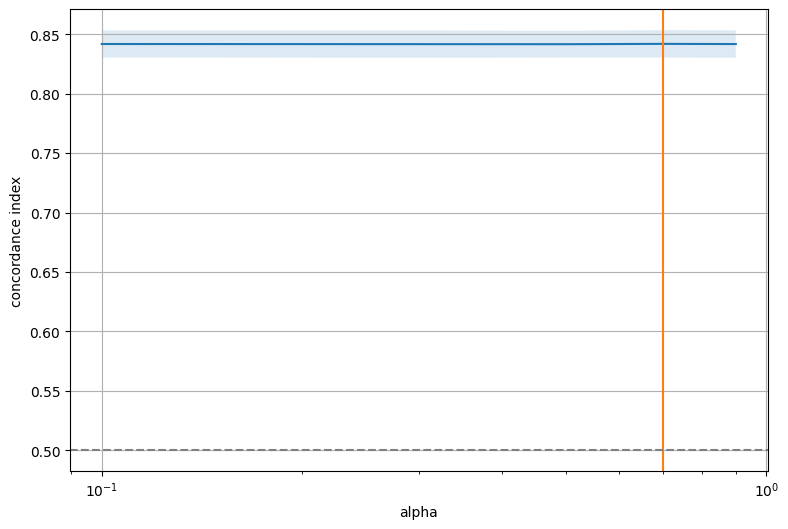

In [36]:
alphas = cv_results.param_alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(ratios, mean)
ax.fill_between(ratios, mean - std, mean + std, alpha=0.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(coxnet_cv.best_params_["l1_ratio"], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

In [23]:
coxnet_cv.best_estimator_

CoxnetSurvivalAnalysis(alphas=[0.01], l1_ratio=0.9)

## Fitting model with best parameter

In [26]:
import time

In [35]:
%%time
random_state = 42
subset = [50, 200, 500, 1000, 2000, 5000, 8000]

coxnet_dict, coxnet_train_scores, coxnet_test_scores = {},{},{}
for n in subset:
    start = time.time() #record iteration start time
    
    # train the forest with subset of training set
    coxnet = CoxnetSurvivalAnalysis(
        l1_ratio=0.9, alphas=[1e-2], max_iter=10000
    ).fit(X_train[:n], y_train[:n])

    stop = time.time() #Record time when training finished
    duration = round(stop - start, 2)
    
    train_sc = coxnet.score(X_train[:n], y_train[:n])
    test_sc = coxnet.score(X_test, y_test)
    print(f"N={n} Training time ({duration}s):\tTrain C-Index: {round(train_sc,3)} | Test C-index: {round(test_sc,3)}")
    
    coxnet_train_scores[str(n)] = train_sc
    coxnet_test_scores[str(n)] = test_sc
    coxnet_dict[str(n)] = coxnet


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=50 Training time (0.52s):	Train C-Index: 1.0 | Test C-index: 0.491


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=200 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=500 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=1000 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=2000 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


N=5000 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491
N=8000 Training time (0.48s):	Train C-Index: 1.0 | Test C-index: 0.491
CPU times: user 3.44 s, sys: 7.62 ms, total: 3.45 s
Wall time: 3.43 s


<timed exec>:11: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=10000).


In [39]:
# coxnet = CoxnetSurvivalAnalysis(l1_ratio=0.9, alphas=[1e-2], max_iter=10000)
# coxnet.fit(X_train, y_train)

In [14]:
coxnet.score(X_train, y_train)

0.8531652706588324

In [15]:
coxnet.score(X_test, y_test)

0.8536128064032016

Number of non-zero coefficients: 73


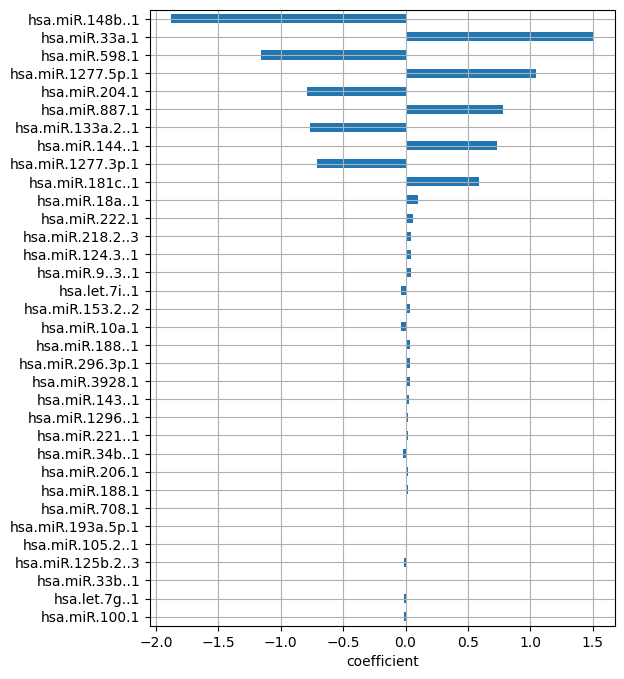

In [43]:

coefficients =  pd.DataFrame({'coefficient': [v[0] for v in coxnet.coef_]}, 
                            index=train_df.columns[:-3])
# coefficients[coefficients!=0]

non_zero = np.sum(coefficients.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = coefficients[abs(coefficients["coefficient"]) > 1e-2]
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)